In [1]:
# just pathing - ignore this
import os
while  not 'juxtorpus' in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

In [2]:
from juxtorpus import analyse
from juxtorpus.corpus import Corpus
import pandas as pd

corpus = Corpus.from_dataframe(pd.read_excel('notebooks/workshops/amazon_us_reviews_gift_cards.xlsx', nrows=1000), col_doc='review_body')

[nltk_data] Downloading package punkt to /Users/hcha9747/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Quotation

In [3]:
quotes , qt = analyse(corpus, method='quotation', doc_id='review_id', entities=['ORG','PERSON','GPE','NORP','FAC','LOC'], add_results=False)

Loading spaCy language model...
This may take a while...
Finished loading.
Extracting quotes...
This may take a while...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 537.85it/s]


In [4]:
quotes.summary()

,
Name,#quotation
Parent,
Corpus Type,Corpus
Number of Documents,12
Number of Total Words,84
Size of Vocabulary,59
mean Words per Document,7
min Words per Document,2
max Words per Document,13
metas,"text_name, quote_entities, speaker, speaker_en..."


# Sentiment Analysis

In [5]:
sentiments = analyse(corpus, method='sentiment', model='textblob', add_results=True)

Spacy Corpus:   0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

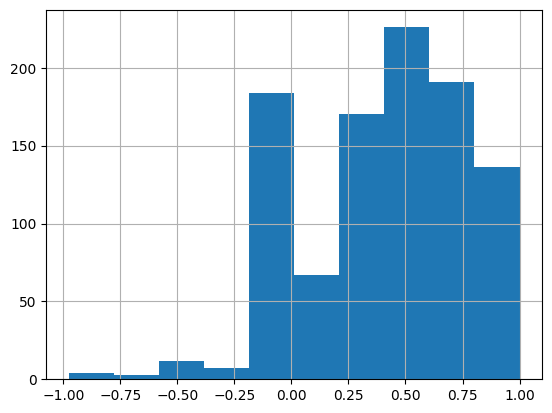

In [6]:
corpus.meta.get('#sentiment').series.hist()

# Topic Modelling (LDA)

In [7]:
lda = analyse(corpus, method='topic_model', num_topics=10, mode='tf', add_results=True)
lda.widget()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.112531 -0.032841       1        1  25.990741
8     -0.149388  0.037313       2        1  17.297700
3     -0.049517 -0.098896       3        1  12.815748
7     -0.143015 -0.034349       4        1   9.589297
5      0.069152 -0.138190       5        1   8.004391
0     -0.016103  0.211115       6        1   7.952915
4      0.020260 -0.020432       7        1   7.651878
1      0.198868  0.041195       8        1   4.351511
9      0.039171  0.074803       9        1   3.933402
2      0.143101 -0.039718      10        1   2.412417, topic_info=          Term        Freq       Total Category  logprob  loglift
516      great  137.000000  137.000000  Default  30.0000  30.0000
502       good   50.000000   50.000000  Default  29.0000  29.0000
359       easy  148.000000  148.000000  Default  28.0000  28.0000
807    perfect   46.000000   46.000000  Default  27.0000  27.0000
889      quick   38.000000   38.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
532       hard    0.740680    5.577166  Topic10  -5.3018   1.7057
460       free    0.740678    9.112510  Topic10  -5.3018   1.2147
775   ordering    0.740677    3.267615  Topic10  -5.3018   2.2403
1076     spend    0.740675    5.746249  Topic10  -5.3018   1.6758
191     choose    0.740674   10.393116  Topic10  -5.3018   1.0832

[606 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         6  0.660656      100
0         8  0.132131      100
4         6  0.642574    30cad
5         8  0.668776     50th
7         2  0.949728  ability
...     ...       ...      ...
1287      3  0.326559    young
1287      8  0.326559    young
1289      5  0.625368  youtube
1291      9  0.889940      yup
1292      4  0.634125  zealand

[962 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 4, 8, 6, 1, 5, 2, 10, 3])

In [8]:
corpus.meta

{'marketplace': <SeriesMeta [Id: marketplace dtype: object]>,
 'customer_id': <SeriesMeta [Id: customer_id dtype: int64]>,
 'review_id': <SeriesMeta [Id: review_id dtype: object]>,
 'product_id': <SeriesMeta [Id: product_id dtype: object]>,
 'product_parent': <SeriesMeta [Id: product_parent dtype: int64]>,
 'product_title': <SeriesMeta [Id: product_title dtype: object]>,
 'product_category': <SeriesMeta [Id: product_category dtype: object]>,
 'star_rating': <SeriesMeta [Id: star_rating dtype: int64]>,
 'helpful_votes': <SeriesMeta [Id: helpful_votes dtype: int64]>,
 'total_votes': <SeriesMeta [Id: total_votes dtype: int64]>,
 'vine': <SeriesMeta [Id: vine dtype: int64]>,
 'verified_purchase': <SeriesMeta [Id: verified_purchase dtype: int64]>,
 'review_headline': <SeriesMeta [Id: review_headline dtype: object]>,
 'review_date': <SeriesMeta [Id: review_date dtype: object]>,
 '#sentiment': <SeriesMeta [Id: #sentiment dtype: float64]>,
 '#topic_model_1': <SeriesMeta [Id: #topic_model_1 dty